# JAM FITTER

In [141]:
import sys,os
from fitlab.resman import RESMAN
from fitlab.mcsamp import MCSAMP
from tools.config import load_config,conf
from tools.tools import load, save,checkdir
import pylab as py
import numpy as np
import pandas as pd
import copy

import matplotlib.pyplot as plt

def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()
%matplotlib inline

## setup path to store the results 

In [142]:
path2results='sidis_only_collins_alexei'
checkdir(path2results)
path2figs='sidis_only_collins_alexei/figs'
checkdir(path2figs)

## SIDIS data sets

In [143]:
conf['datasets']={}
# Collins Asy

conf['datasets']['sidis']={}
conf['datasets']['sidis']['norm']={}
conf['datasets']['sidis']['xlsx']={}
conf['datasets']['sidis']['filters']={}

conf['datasets']['sidis']['filters'][0]={}
conf['datasets']['sidis']['filters'][0]['idx']=[4001,4000,4002,4004,4003,4005,3027,3025,3010,3012,3005,3013,3026,3000,3003,3016,3004,3018]
conf['datasets']['sidis']['filters'][0]['filter']="z>0.2 and z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"

#conf["datasets"]["sidis"]["xlsx"][4007]="../database/sidis/expdata/4007.xlsx"  #  compass  deuteron   k+   pT
#conf["datasets"]["sidis"]["xlsx"][4006]="../database/sidis/expdata/4006.xlsx"  #  compass  deuteron   k+    x
#conf["datasets"]["sidis"]["xlsx"][4008]="../database/sidis/expdata/4008.xlsx"  #  compass  deuteron   k+    z
#conf["datasets"]["sidis"]["xlsx"][4010]="../database/sidis/expdata/4010.xlsx"  #  compass  deuteron   k-   pT
#conf["datasets"]["sidis"]["xlsx"][4009]="../database/sidis/expdata/4009.xlsx"  #  compass  deuteron   k-    x
#conf["datasets"]["sidis"]["xlsx"][4011]="../database/sidis/expdata/4011.xlsx"  #  compass  deuteron   k-    z
conf["datasets"]["sidis"]["xlsx"][4001]="sidis/expdata/4001.xlsx"  #  compass  deuteron  pi+   pT
conf["datasets"]["sidis"]["xlsx"][4000]="sidis/expdata/4000.xlsx"  #  compass  deuteron  pi+    x
conf["datasets"]["sidis"]["xlsx"][4002]="sidis/expdata/4002.xlsx"  #  compass  deuteron  pi+    z
conf["datasets"]["sidis"]["xlsx"][4004]="sidis/expdata/4004.xlsx"  #  compass  deuteron  pi-   pT
conf["datasets"]["sidis"]["xlsx"][4003]="sidis/expdata/4003.xlsx"  #  compass  deuteron  pi-    x
conf["datasets"]["sidis"]["xlsx"][4005]="sidis/expdata/4005.xlsx"  #  compass  deuteron  pi-    z
#conf["datasets"]["sidis"]["xlsx"][6003]="../database/sidis/expdata/6003.xlsx"  #  compass    proton   k+   pt
#conf["datasets"]["sidis"]["xlsx"][6004]="../database/sidis/expdata/6004.xlsx"  #  compass    proton   k+    x
#conf["datasets"]["sidis"]["xlsx"][6005]="../database/sidis/expdata/6005.xlsx"  #  compass    proton   k+    z
#conf["datasets"]["sidis"]["xlsx"][6000]="../database/sidis/expdata/6000.xlsx"  #  compass    proton   k-   pt
#conf["datasets"]["sidis"]["xlsx"][6001]="../database/sidis/expdata/6001.xlsx"  #  compass    proton   k-    x
#conf["datasets"]["sidis"]["xlsx"][6002]="../database/sidis/expdata/6002.xlsx"  #  compass    proton   k-    z
conf["datasets"]["sidis"]["xlsx"][3027]="sidis/expdata/3027.xlsx"  #  compass    proton  pi+   pt
conf["datasets"]["sidis"]["xlsx"][3025]="sidis/expdata/3025.xlsx"  #  compass    proton  pi+    x
conf["datasets"]["sidis"]["xlsx"][3010]="sidis/expdata/3010.xlsx"  #  compass    proton  pi+    z
conf["datasets"]["sidis"]["xlsx"][3012]="sidis/expdata/3012.xlsx"  #  compass    proton  pi-   pt
conf["datasets"]["sidis"]["xlsx"][3005]="sidis/expdata/3005.xlsx"  #  compass    proton  pi-    x
conf["datasets"]["sidis"]["xlsx"][3013]="sidis/expdata/3013.xlsx"  #  compass    proton  pi-    z
#conf["datasets"]["sidis"]["xlsx"][3024]="../database/sidis/expdata/3024.xlsx"  #   HERMES    proton   k+   pt
#conf["datasets"]["sidis"]["xlsx"][3007]="../database/sidis/expdata/3007.xlsx"  #   HERMES    proton   k+    x
#conf["datasets"]["sidis"]["xlsx"][3008]="../database/sidis/expdata/3008.xlsx"  #   HERMES    proton   k+    z
#conf["datasets"]["sidis"]["xlsx"][3021]="../database/sidis/expdata/3021.xlsx"  #   HERMES    proton   k-   pt
#conf["datasets"]["sidis"]["xlsx"][3017]="../database/sidis/expdata/3017.xlsx"  #   HERMES    proton   k-    x
#conf["datasets"]["sidis"]["xlsx"][3023]="../database/sidis/expdata/3023.xlsx"  #   HERMES    proton   k-    z
conf["datasets"]["sidis"]["xlsx"][3026]="sidis/expdata/3026.xlsx"  #   HERMES    proton  pi+   pt
conf["datasets"]["sidis"]["xlsx"][3000]="sidis/expdata/3000.xlsx"  #   HERMES    proton  pi+    x
conf["datasets"]["sidis"]["xlsx"][3003]="sidis/expdata/3003.xlsx"  #   HERMES    proton  pi+    z
conf["datasets"]["sidis"]["xlsx"][3016]="sidis/expdata/3016.xlsx"  #   HERMES    proton  pi-   pt
conf["datasets"]["sidis"]["xlsx"][3004]="sidis/expdata/3004.xlsx"  #   HERMES    proton  pi-    x
conf["datasets"]["sidis"]["xlsx"][3018]="sidis/expdata/3018.xlsx"  #   HERMES    proton  pi-    z

for k in conf['datasets']['sidis']['xlsx']: conf['datasets']['sidis']['norm'][k]={'value':1,'fixed':True,'min':0,'max':1}


## parameters

In [144]:
conf['params']={}
conf['shape']=1
conf['basis']='default'

### TMD PDF/FF parameters (from upol analysis)

In [145]:
conf['params']['pdf']={}
conf['params']['pdf']['widths0 valence']  = {'value':0.52414,'fixed':True,'min':0.3,'max':0.7}
conf['params']['pdf']['widths0 sea']      = {'value':0.58465,'fixed':True,'min':0.2,'max':1.}
conf['params']['ff']={}
conf['params']['ff']['widths0 pi+ fav']   = {'value':0.12405,'fixed':True,'min':0.1,'max':0.2}
conf['params']['ff']['widths0 pi+ unfav'] = {'value':0.14373,'fixed':True,'min':0.1,'max':0.2}

### TMD Collins and transversityparameters

In [146]:
conf['params']['collins']={}
conf['params']['collins']['widths0 pi+ fav']     = {'value':0.10744,'fixed':False,'min':1e-5,'max':0.12405}
conf['params']['collins']['widths0 pi+ unfav']   = {'value':0.11533,'fixed':False,'min':1e-5,'max':0.14373}
#conf['params']['collins']['widths0 pi+ unfav']   = {'value':0.07649,'fixed':False,'min':1e-5,'max':0.2}
conf['params']['collins']['pi+ u N 1']  = {'value': 1.51941,'fixed':False,'min':0,'max':5}
conf['params']['collins']['pi+ u a 1']  = {'value':-1.42482,'fixed':False,'min':-2.59,'max':2}
conf['params']['collins']['pi+ u b 1']  = {'value': 3.33154,'fixed':False,'min':0.5,'max':7.}

conf['params']['collins']['pi+ d N 1']  = {'value':-6.76308,'fixed':False,'min':-18,'max':0}
conf['params']['collins']['pi+ d a 1']  = {'value':0.49530,'fixed':False,'min': -2.,'max':3.}
conf['params']['collins']['pi+ d b 1']  = {'value':2.93695,'fixed':False,'min':0.0,'max':6.8}

conf['params']['collins']['pi+ u c 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d c 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ u d 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d d 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

conf['params']['collins']['pi+ u N 2']  = {'value': 0.,'fixed':True,'min':0,'max':15}
conf['params']['collins']['pi+ u a 2']  = {'value': 5.23875,'fixed':True,'min':0,'max':10}
conf['params']['collins']['pi+ u b 2']  = {'value': 3.41155,'fixed':True,'min':0,'max':10}

conf['params']['collins']['pi+ d N 2']  = {'value': 0.0,'fixed':True,'min':-20,'max':0}
conf['params']['collins']['pi+ d a 2']  = {'value': 0.0,'fixed':True,'min':-1,'max':5}
conf['params']['collins']['pi+ d b 2']  = {'value': 0.0,'fixed':True,'min':1e-5,'max':10}
conf['params']['collins']['pi+ u c 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d c 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ u d 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d d 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

conf['params']['transversity']={}
conf['params']['transversity']['widths0 valence'] = {'value':0.44744,'fixed':False,'min':1e-5,'max':0.52414}
conf['params']['transversity']['widths0 sea']     = {'value':4.04126169244575006445e-01,'fixed':True,'min':1e-5,'max':0.58465}
conf['params']['transversity']['u N']             = {'value':4.23699 ,'fixed':False,'min':-1,'max':15}
conf['params']['transversity']['u a']             = {'value':0.76267,'fixed':False,'min':-2,'max':3}
conf['params']['transversity']['u b']             = {'value':5.42791,'fixed':False,'min':1e-5,'max':112}
conf['params']['transversity']['d N']             = {'value':-10.31583,'fixed':False,'min':-37,'max':3}
conf['params']['transversity']['d a']             = {'value':0.75678,'fixed':False,'min':-1,'max':3}
conf['params']['transversity']['d b']             = {'value':6.29610,'fixed':False,'min':1e-5,'max':20}
conf['params']['transversity']['s N']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['s a']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-1,'max':5}
conf['params']['transversity']['s b']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':1e-5,'max':10}

conf['params']['transversity']['u c']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['d c']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['s c']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}

conf['params']['transversity']['u d']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['d d']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['s d']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}

## Nested Sampling

### initialize fitpack libraries

In [150]:
conf['ncpus']=1
conf['resman'] = RESMAN()
mcsamp=MCSAMP()

loading sidis data sets 3013
multiprocess setup: ncpus=1 / observable


### start multiple NS runs
- the code will start n independent runs specified by size

In [151]:
conf['size']=10
conf['factor']=4 # play with the factor (3,4) and the tolerance (1.e-5,1.e-10)
conf['tol']=1e-2
mcsamp.run(path2results)

iter=8575  logz=30.598 rel-err=9.988e-11  t-elapsed=7.780e+04  dchi2min=-5.477e+01 dchi2max=-5.477e+01

### combine multiple runs into one big run

In [67]:
MC=mcsamp.get_MC_samples(path2results+'/mcdata')

runs max likelihoods
-27.385132664
-27.3851326165
-27.3851326662
-27.3851326395
-27.3851326437
-27.3851326428
-27.3851326653
-27.385132646
-27.3851326494
-27.3851326511
sample  size= 82678
sample2 size= 3781


### distribution of parameters

     widths0 pi+ fav =    0.10951 +/-    0.01113
   widths0 pi+ unfav =    0.11136 +/-    0.02126
           pi+ u N 1 =    1.93342 +/-    0.98551
           pi+ u a 1 =   -0.60969 +/-    0.39810
           pi+ u b 1 =    2.74685 +/-    0.89608
           pi+ d N 1 =   -6.75825 +/-    2.67657
           pi+ d a 1 =    0.21753 +/-    0.67415
           pi+ d b 1 =    4.35346 +/-    1.08476
     widths0 valence =    0.44669 +/-    0.05497
                 u N =    6.49889 +/-    3.21627
                 u a =    0.78997 +/-    0.25571
                 u b =    5.49784 +/-    1.87111
                 d N =  -15.28722 +/-    6.87704
                 d a =    0.75167 +/-    0.30535
                 d b =    6.79805 +/-    3.34100


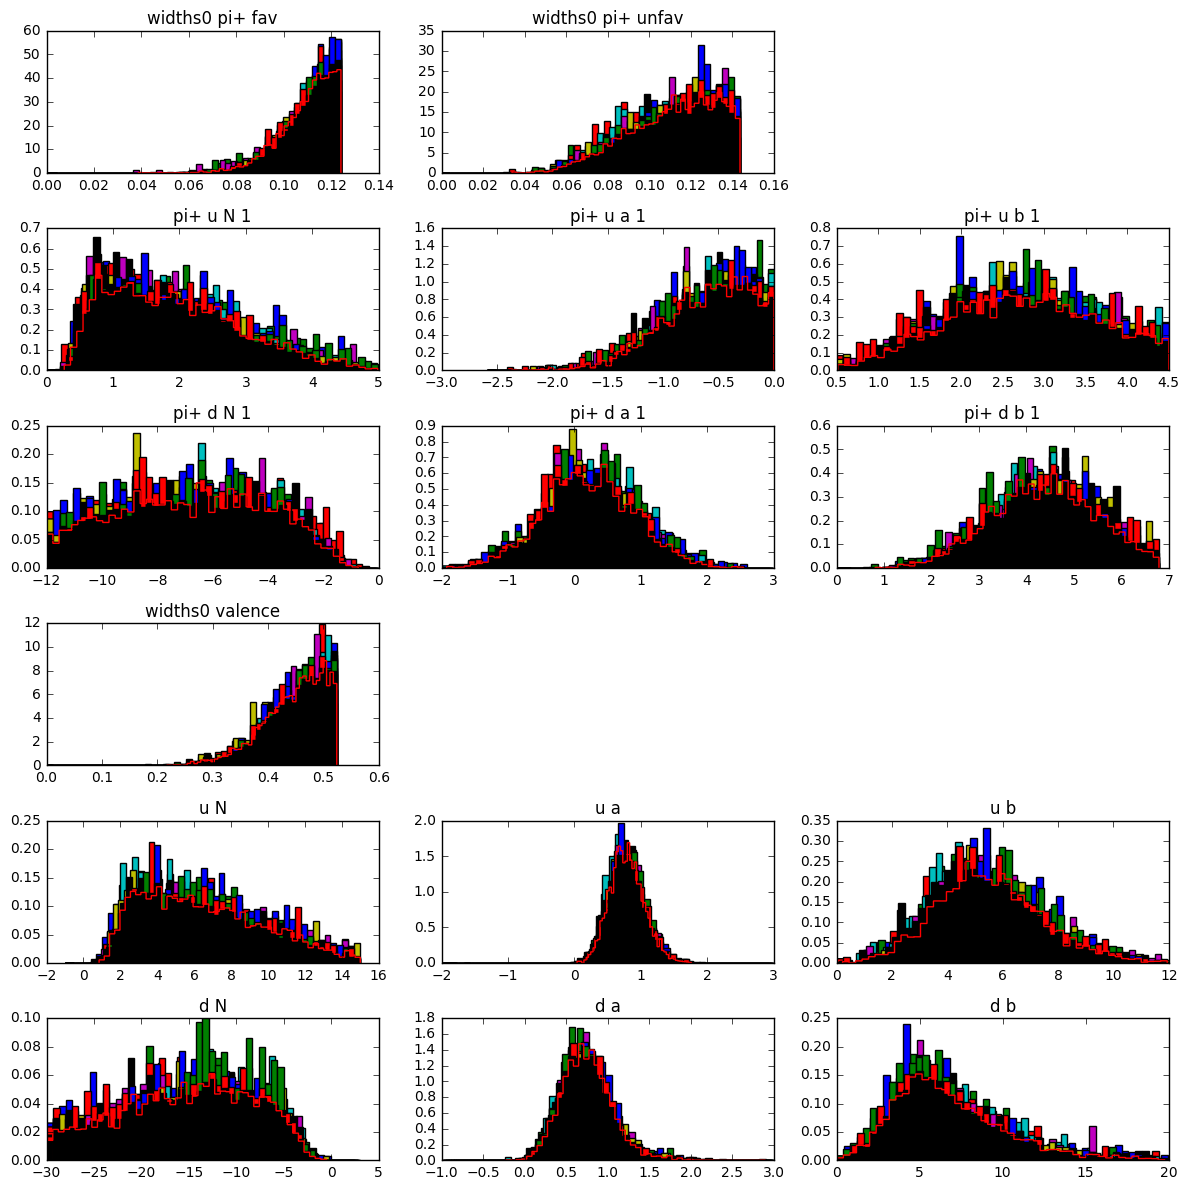

In [69]:
samples=MC['samples']
samples2=MC['samples2']
weights=MC['weights']
weights2=MC['weights2']
order=MC['order']
runs=MC['runs']

nrows,ncols=6,3
fig = py.figure(figsize=(ncols*4,nrows*2))

def get_idx(key,tag):
    for i in range(len(order)):
        if order[i][1]==key and order[i][2]==tag:
            return i

global cnt
cnt=0
def plot(tags):
    global cnt
    for i in range(1,len(tags)):
        cnt+=1
        if tags[i]==None: continue
        idx=get_idx(tags[0],tags[i])
        ax=py.subplot(nrows,ncols,cnt)
        vmin=np.amin(samples2.T[idx])
        vmax=np.amax(samples2.T[idx])
        R=None#(vmin,vmax)
        for k in runs:
            ax.hist(runs[k]['samples'].T[idx],weights=runs[k]['weights'],bins=50,normed=True,range=R)
        ax.hist(samples.T[idx],weights=weights,bins=50,color='k',normed=True,range=R)
        ax.hist(samples2.T[idx],weights=weights2,bins=50,color='r',histtype='step',normed=True,range=R)
        ax.set_title(tags[i])
        mean=np.einsum('i,i',samples2.T[idx],weights2)
        std=np.einsum('i,i',(samples2.T[idx]-mean)**2,weights2)**0.5
        print '%20s = %10.5f +/- %10.5f'%(tags[i],mean,std)
        #ax.set_xlim(vmin,vmax)
    py.tight_layout()
    py.savefig("%s/parameters.pdf"%path2figs)

plot(['collins','widths0 pi+ fav','widths0 pi+ unfav',None])
plot(['collins','pi+ u N 1','pi+ u a 1','pi+ u b 1'])
plot(['collins','pi+ d N 1','pi+ d a 1','pi+ d b 1'])
#plot(['collins','pi+ u N 2','pi+ u a 2','pi+ u b 2'])

plot(['transversity','widths0 valence',None,None])
plot(['transversity','u N','u a','u b'])
plot(['transversity','d N','d a','d b'])

## data vs theory

In [70]:
data={'weights':MC['weights2']}
cnt=0
for s in MC['samples2']:
    cnt+=1    
    lprint('%d/%d'%(cnt,len(MC['samples2'])))  
    conf['resman'].get_residuals(s);
    for k in conf['resman'].sidisres.tabs:
        if k  not in data: data[k]=[]
        thy=conf['resman'].sidisres.tabs[k]['thy']    
        norm=conf['datasets']['sidis']['norm'][k]['value']
        shift=conf['resman'].sidisres.tabs[k]['shift']        
        data[k].append(shift+thy/norm)
save(data,'%s/%s'%(path2results,'sidis.dat'))   

3781/3781

### compute averages and collect results

In [71]:
data=load('%s/%s'%(path2results,'sidis.dat'))   
for k in data: data[k]=np.array(data[k])
thy,dthy={},{}
for k in data:
    if k=='weights': continue
    thy[k]=np.einsum('i,ik->k',data['weights'],data[k])
    dthy[k]=np.einsum('i,ik->k',data['weights'],(data[k]-thy[k])**2)**0.5
for k in thy: 
    conf['resman'].sidisres.tabs[k]['thy']=copy.copy(thy[k])
    conf['resman'].sidisres.tabs[k]['dthy']=copy.copy(dthy[k])

In [72]:
report=conf['resman'].gen_report(verb=0,level=1)
delimiters=[]
for i in range(len(report)): 
    if 'reaction:' in report[i]: 
        delimiters.append(i) 

data={}
nlines=len(report)
for i in range(len(delimiters)):
    ini=delimiters[i]
    if i==len(delimiters)-1: fin=len(report)
    else: fin=delimiters[i+1]
    reaction=report[ini].replace('reaction:','').strip()
    data[reaction]={'raw data':report[ini:fin]}
    
for k in data:
    print k
    block=data[k]['raw data']
    isep=[i for i in range(len(block)) if '--------' in block[i]][0]
    data[k]['summary']=[block[i] for i in range(isep)]
    data[k]['tables']=[block[i] for i in range(isep+1,len(block))]

    tabs={}
    for l in data[k]['tables']:
        info=l.split(',')
        col=[s for s in info if 'col' in s][0].split('=')[1].strip()
        if col not in tabs: tabs[col]={}
        info=[[ss.strip() for ss in s.split('=')] for s in info if 'col' not in info  if s.strip()!='']
        
        for s in info:
            if s[0] not in tabs[col]: tabs[col][s[0]]=[]
        
        for s in info:
            try:
                value=float(s[1])
            except:
                value=s[1]
            tabs[col][s[0]].append(value)        

    data[k]['tabs']=tabs
save(data,'%s/%s'%(path2results,'data_and_thy.dat'))

sidis


In [73]:
def summary():
    for k in data:
        print ""
        for l in data[k]['summary']: print l
summary()


reaction: sidis
    idx        tar        had        col        obs  npts       chi2      rchi2      nchi2
   4000   deuteron        pi+    compass AUTcollins     6       2.45       0.00       0.00
   4001   deuteron        pi+    compass AUTcollins     6       3.48       0.00       0.00
   4002   deuteron        pi+    compass AUTcollins     6       2.14       0.00       0.00
   4003   deuteron        pi-    compass AUTcollins     6       3.15       0.00       0.00
   4004   deuteron        pi-    compass AUTcollins     6       8.47       0.00       0.00
   4005   deuteron        pi-    compass AUTcollins     6       6.05       0.00       0.00
   3016     proton        pi-     HERMES AUTcollins     5       3.87       0.00       0.00
   3018     proton        pi-     HERMES AUTcollins     6       1.69       0.00       0.00
   3010     proton        pi+    compass AUTcollins     6       1.95       0.00       0.00
   3025     proton        pi+    compass AUTcollins     7       5.42     

### plot data and theory

In [74]:
ALL=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys()])

ALL.columns

Index([          u'N',          u'Q2',       u'Shift',           u'W',
                u'W2',       u'alpha',         u'col',  u'dependence',
              u'dthy',          u'dy',     u'error_u',      u'hadron',
               u'obs',          u'pT',       u'pTmax',       u'pTmin',
       u'r-residuals',   u'residuals',       u'shift',      u'stat_u',
            u'syst_u',      u'target',         u'thy',       u'value',
                 u'x',        u'xmax',        u'xmin',           u'y',
                u'yh',          u'yp',           u'z',        u'zmax',
              u'zmin'],
      dtype='object')

## Plot data and theory

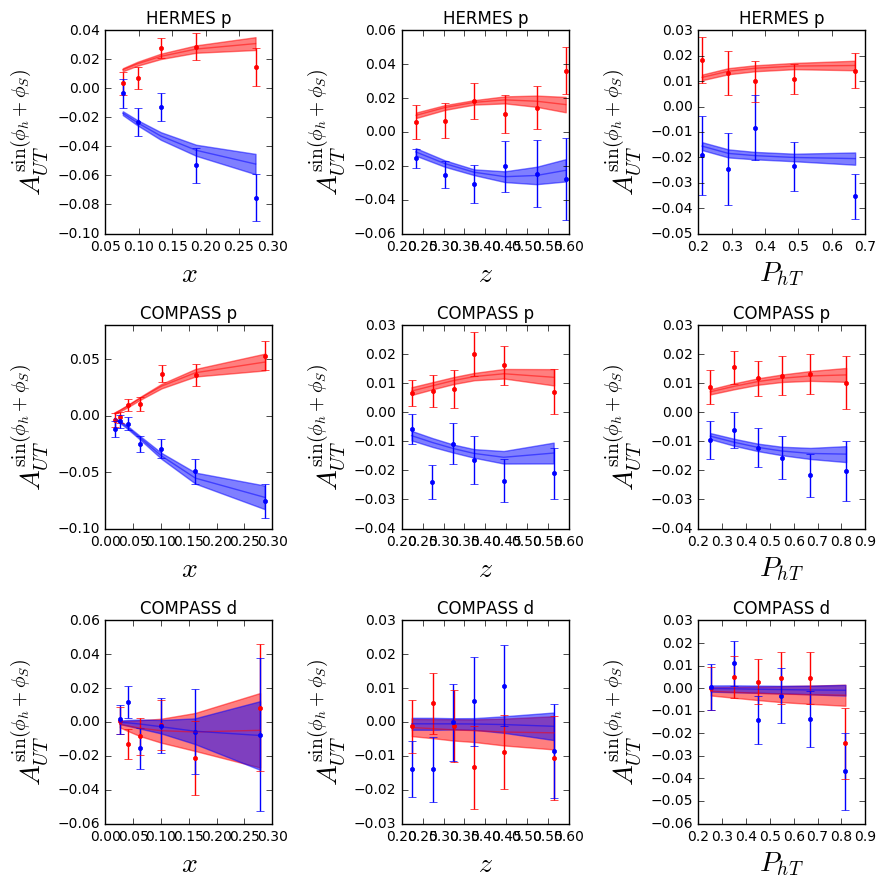

In [89]:
data=load('%s/%s'%(path2results,'data_and_thy.dat'))

nrows,ncols=3,3
fig = py.figure(figsize=(ncols*3,nrows*3))


tab=pd.DataFrame(data['sidis']['tabs']['HERMES']).query('tar=="proton"')
cnt=0
for dep in ['x','z','pT']:
    cnt+=1
    if dep=='pT': _dep='pt'
    else: _dep=dep
    ax=py.subplot(nrows,ncols,cnt)
    _tab=tab.query('dep=="%s"'%_dep)
    pip=_tab.query('had=="pi+"')
    pim=_tab.query('had=="pi-"')
    if dep=='pT': label='P_{hT}'
    if dep=='x': label='x'
    if dep=='z': label='z'                
    ax.errorbar(pip[dep],pip['exp'],yerr=pip['alpha'],fmt='r.')
    ax.errorbar(pim[dep],pim['exp'],yerr=pim['alpha'],fmt='b.')
    ax.plot(pip[dep],pip['thy'],color='r',alpha=0.5)
    ax.plot(pim[dep],pim['thy'],color='b',alpha=0.5)
    ax.fill_between(pip[dep],(pip['thy']-pip['dthy']),(pip['thy']+pip['dthy']),color='r',alpha=0.5)
    ax.fill_between(pim[dep],(pim['thy']-pim['dthy']),(pim['thy']+pim['dthy']),color='b',alpha=0.5)
    ax.set_xlabel(r'$%s$'%label,size=20); ax.set_ylabel(r'$A_{UT}^{\sin(\phi_h+\phi_S)}$',size=20)
    ax.set_title('HERMES p')

    
tab=pd.DataFrame(data['sidis']['tabs']['compass']).query('tar=="proton"')
for dep in ['x','z','pT']:
    cnt+=1
    if dep=='pT': _dep='pt'
    else: _dep=dep
    ax=py.subplot(nrows,ncols,cnt)
    _tab=tab.query('dep=="%s"'%_dep)
    pip=_tab.query('had=="pi+"')
    pim=_tab.query('had=="pi-"')
    if dep=='pT': label='P_{hT}'
    if dep=='x': label='x'
    if dep=='z': label='z'                
    ax.errorbar(pip[dep],-pip['exp'],yerr=pip['alpha'],fmt='r.')
    ax.errorbar(pim[dep],-pim['exp'],yerr=pim['alpha'],fmt='b.')
    ax.plot(pip[dep],-pip['thy'],color='r',alpha=0.5)
    ax.plot(pim[dep],-pim['thy'],color='b',alpha=0.5)
    ax.fill_between(pip[dep],-(pip['thy']-pip['dthy']),-(pip['thy']+pip['dthy']),color='r',alpha=0.5)
    ax.fill_between(pim[dep],-(pim['thy']-pim['dthy']),-(pim['thy']+pim['dthy']),color='b',alpha=0.5)
    ax.set_xlabel(r'$%s$'%label,size=20); ax.set_ylabel(r'$A_{UT}^{\sin(\phi_h+\phi_S)}$',size=20)
    ax.set_title('COMPASS p')

tab=pd.DataFrame(data['sidis']['tabs']['compass']).query('tar=="deuteron"')
for dep in ['x','z','pT']:
    cnt+=1
    if dep=='pT': _dep='pT'
    else: _dep=dep
    if dep=='pT': label='P_{hT}'
    if dep=='x': label='x'
    if dep=='z': label='z'                
    ax=py.subplot(nrows,ncols,cnt)
    _tab=tab.query('dep=="%s"'%_dep)
    pip=_tab.query('had=="pi+"')
    pim=_tab.query('had=="pi-"')
    ax.errorbar(pip[dep],-pip['exp'],yerr=pip['alpha'],fmt='r.')
    ax.errorbar(pim[dep],-pim['exp'],yerr=pim['alpha'],fmt='b.')
    ax.plot(pip[dep],-pip['thy'],color='r',alpha=0.5)
    ax.plot(pim[dep],-pim['thy'],color='b',alpha=0.5)
    ax.fill_between(pip[dep],-(pip['thy']-pip['dthy']),-(pip['thy']+pip['dthy']),color='r',alpha=0.5)
    ax.fill_between(pim[dep],-(pim['thy']-pim['dthy']),-(pim['thy']+pim['dthy']),color='b',alpha=0.5)
    ax.set_xlabel(r'$%s$'%label,size=20); ax.set_ylabel(r'$A_{UT}^{\sin(\phi_h+\phi_S)}$',size=20)
    ax.set_title('COMPASS d')


py.tight_layout()
py.savefig("%s/data_vs_theory.pdf"%path2figs)

## PDFs and FFs

In [75]:
def calc(func):
    RAW=[]
    cnt=0
    for s in MC['samples2']:
        cnt+=1    
        lprint('%d/%d'%(cnt,len(MC['samples2'])))  
        conf['parman'].set_new_params(s);    
        RAW.append(func())
    RAW=np.array(RAW)
    f =np.einsum('k,kif->if',MC['weights2'],RAW)
    df=np.einsum('k,kif->if',MC['weights2'],(RAW-f)**2)**0.5
    f=np.einsum('if->fi',f)
    df=np.einsum('if->fi',df)
    return {'f':f,'df':df}

In [76]:
#Z1=10**np.linspace(-4,-2)
#Z2=np.linspace(0.0101,0.999)
#Z=np.append(Z1,Z2)
Z2=np.linspace(0.2,0.999)
Hpi=calc(lambda : [conf['collins'].get_C(z,1,'pi+') for z in Z])

3781/3781

In [77]:
X1=10**np.linspace(-4,-2)
X2=np.linspace(0.0101,0.999)
X=np.append(X1,X2)
Q2=2.
TR=calc(lambda : [conf['transversity'].get_C(x,Q2,target='p') for x in X])

3781/3781

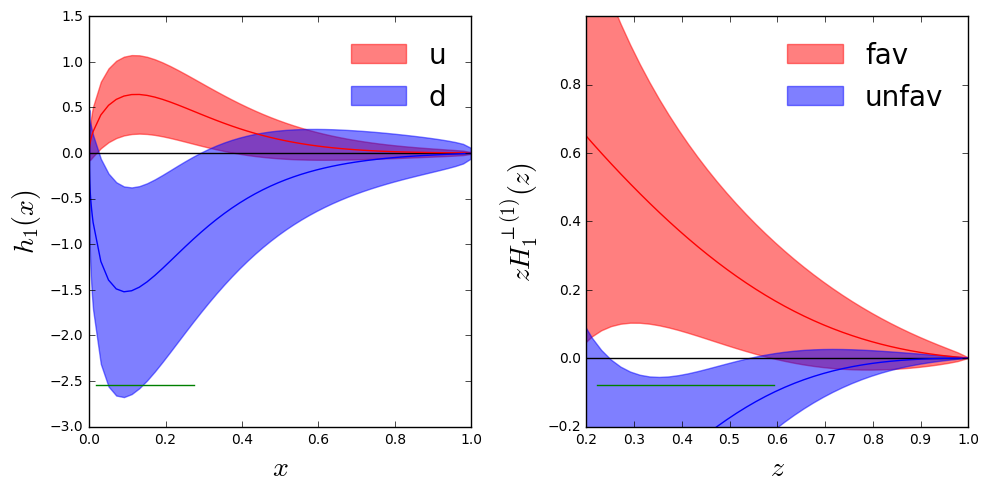

In [140]:
nrows,ncols=1,2
py.figure(figsize=(ncols*5,nrows*5))

ax=py.subplot(nrows,ncols,1)
ax.fill_between(X,TR['f'][1]-TR['df'][1],TR['f'][1]+TR['df'][1],color='r',alpha=0.5,label="u")
ax.fill_between(X,TR['f'][3]-TR['df'][3],TR['f'][3]+TR['df'][3],color='b',alpha=0.5,label="d")
ax.plot(X,X*0,'black')
ax.plot(X,TR['f'][1],'r')
ax.plot(X,TR['f'][3],'b')
ax.set_ylabel(r'$h_{1}(x)$',size=20)
ax.set_xlabel(r'$x$',size=20)
ax.set_ylim(-3.,1.5)
ax.set_xlim(0.,1)
zmin=np.amin(data['sidis']['tabs']['compass']['x'])
zmax=np.amax(data['sidis']['tabs']['HERMES']['x'])
ymin,ymax=ax.get_ylim()
dy=ymax-ymin
ax.plot([zmin,zmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
ax.legend(fontsize=20,frameon=False)

ax=py.subplot(nrows,ncols,2)
ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5,label="fav")
ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5,label="unfav")
ax.plot(Z,Z*0,'black')
ax.plot(Z,Z*Hpi['f'][1],'r')
ax.plot(Z,Z*Hpi['f'][3],'b')
ax.set_ylabel(r'$z H_1^{\perp (1)}(z)$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.set_ylim(-0.2,1.)
ax.set_xlim(0.2,1)
zmin=np.amin(data['sidis']['tabs']['compass']['z'])
zmax=np.amax(data['sidis']['tabs']['HERMES']['z'])
ymin,ymax=ax.get_ylim()
dy=ymax-ymin
ax.plot([zmin,zmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
ax.legend(fontsize=20,frameon=False)



py.tight_layout()
py.savefig("%s/collins.pdf"%path2figs)


## Tensor charge

In [138]:
def calc2(func):
    RAW=[]
    cnt=0
    for s in MC['samples2']:
        cnt+=1    
        lprint('%d/%d'%(cnt,len(MC['samples2'])))  
        conf['parman'].set_new_params(s);    
        RAW.append(func())
    RAW=np.array(RAW)
    f =np.einsum('k,k',MC['weights2'],RAW)
    df=np.einsum('k,k',MC['weights2'],(RAW-f)**2)**0.5
    return {'f':f,'df':df}

gT=calc2(conf['moments'].get_gT)
print 'gT =',gT['f'],'+-',gT['df']

3781/3781gT = 0.760919952386 +- 0.650910547231
